In [99]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import linregress
import scipy.stats as stats
import pprint
import requests
import json

In [100]:
# import CSVs & convert to df
csv = pd.read_csv('HPI_AT_BDL_state.csv', header=6)
df = pd.DataFrame(csv)
df

,State,Abbreviation,FIPS,Year,Annual Change (%),HPI,HPI with 1990 base,HPI with 2000 base,Unnamed: 8
0,Alabama,AL,1,1975,.,100.00,49.74,36.16,NaN
1,Alabama,AL,1,1976,6.70,106.70,53.08,38.58,NaN
2,Alabama,AL,1,1977,10.00,117.37,58.39,42.44,NaN
3,Alabama,AL,1,1978,8.38,127.21,63.28,46.00,NaN
4,Alabama,AL,1,1979,10.73,140.86,70.07,50.93,NaN
...,...,...,...,...,...,...,...,...,...
2392,Wyoming,WY,56,2017,1.53,562.49,314.07,186.94,NaN
2393,Wyoming,WY,56,2018,3.52,582.27,325.12,193.51,NaN
2394,Wyoming,WY,56,2019,4.36,607.64,339.28,201.94,NaN
2395,Wyoming,WY,56,2020,3.72,630.24,351.90,209.45,NaN


In [103]:
# import and convert CSV on national data into df
national_csv = pd.read_csv('../3. Research/HPI_AT_BDL_national.csv', header=6)
national_df = pd.DataFrame(national_csv)
national_df.head()

,Year,Annual Change (%),HPI,HPI with 1990 base,HPI with 2000 base
0,1975,.,100.00,35.24,26.22
1,1976,5.55,105.55,37.19,27.67
2,1977,13.49,119.79,42.21,31.41
3,1978,14.88,137.61,48.49,36.08
4,1979,13.51,156.21,55.04,40.96


In [104]:
# drop columns
reduced_df = df.drop(columns=['HPI with 1990 base', 'HPI with 2000 base', 'Unnamed: 8', 'FIPS'])
reduced_df

,State,Abbreviation,Year,Annual Change (%),HPI
0,Alabama,AL,1975,.,100.00
1,Alabama,AL,1976,6.70,106.70
2,Alabama,AL,1977,10.00,117.37
3,Alabama,AL,1978,8.38,127.21
4,Alabama,AL,1979,10.73,140.86
...,...,...,...,...,...
2392,Wyoming,WY,2017,1.53,562.49
2393,Wyoming,WY,2018,3.52,582.27
2394,Wyoming,WY,2019,4.36,607.64
2395,Wyoming,WY,2020,3.72,630.24


In [108]:
# Reduce df to Colorado/Vermont with just the years needed
colorado_df = reduced_df.loc[((reduced_df['State'] == 'Colorado') | (reduced_df['State'] == 'Vermont'))\
                     & ((reduced_df['Year'] >= 2011) & (reduced_df['Year'] <= 2017))]

# Reduce national df to the same years
national_2011 = national_df.loc[((national_df['Year'] >= 2011) & (national_df['Year'] <= 2017))]

colorado_df

,State,Abbreviation,Year,Annual Change (%),HPI
271,Colorado,CO,2011,-3.13,534.87
272,Colorado,CO,2012,0.74,538.81
273,Colorado,CO,2013,5.32,567.47
274,Colorado,CO,2014,9.13,619.27
275,Colorado,CO,2015,9.42,677.59
276,Colorado,CO,2016,10.29,747.34
277,Colorado,CO,2017,8.68,812.22
2151,Vermont,VT,2011,-1.07,539.08
2152,Vermont,VT,2012,-0.63,535.67
2153,Vermont,VT,2013,-0.35,533.80


In [109]:
# Washington/New Jersey DF
washington_df = reduced_df.loc[((reduced_df['State'] == 'Washington') | (reduced_df['State'] == 'New Jersey'))\
                     & ((reduced_df['Year'] >= 2011) & (reduced_df['Year'] <= 2017))]
washington_df

,State,Abbreviation,Year,Annual Change (%),HPI
1446,New Jersey,NJ,2011,-4.19,658.84
1447,New Jersey,NJ,2012,-3.49,635.81
1448,New Jersey,NJ,2013,0.38,638.23
1449,New Jersey,NJ,2014,2.88,656.62
1450,New Jersey,NJ,2015,2.28,671.59
1451,New Jersey,NJ,2016,2.36,687.45
1452,New Jersey,NJ,2017,2.25,702.94
2245,Washington,WA,2011,-6.47,676.38
2246,Washington,WA,2012,-2.44,659.84
2247,Washington,WA,2013,4.80,691.55


In [110]:
# Oregon/Rhode Island DF
oregon_df = reduced_df.loc[((reduced_df['State'] == 'Oregon') | (reduced_df['State'] == 'Rhode Island'))\
                     & ((reduced_df['Year'] >= 2013) & (reduced_df['Year'] <= 2019))]

# Reduce national df to the same years
national_2013 = national_df.loc[((national_df['Year'] >= 2013) & (national_df['Year'] <= 2019))]

oregon_df

,State,Abbreviation,Year,Annual Change (%),HPI
1777,Oregon,OR,2013,6.15,600.47
1778,Oregon,OR,2014,9.55,657.83
1779,Oregon,OR,2015,7.78,708.98
1780,Oregon,OR,2016,10.85,785.87
1781,Oregon,OR,2017,7.99,848.65
1782,Oregon,OR,2018,6.27,901.87
1783,Oregon,OR,2019,4.30,940.63
1871,Rhode Island,RI,2013,-0.15,595.07
1872,Rhode Island,RI,2014,3.08,613.41
1873,Rhode Island,RI,2015,4.44,640.64


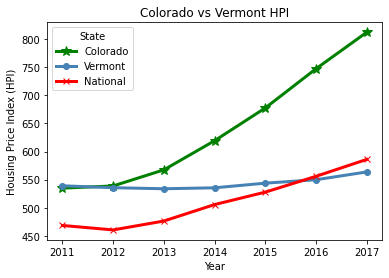

In [111]:
### Create line graph comparing HPI of Colorado and Vermont

#Create pivot tables for plotting
colorado_pivot = colorado_df.pivot(index='Year', columns='State', values='HPI')
colorado_pivot = colorado_pivot.reset_index()

colorado_percent = colorado_df.pivot(index='Year', columns='State', values='Annual Change (%)')
colorado_percent = colorado_percent.reset_index()

# Set variables and plot
colorado_x = colorado_pivot['Year']
colorado_y = colorado_pivot['Colorado']

vermont_x = colorado_pivot['Year']
vermont_y =colorado_pivot['Vermont']

national_x = national_2011['Year']
national_y = national_2011['HPI']

colorado = plt.plot(colorado_x, colorado_y, color='g', linewidth=3, marker = '*', markersize=10)
vermont = plt.plot(vermont_x, vermont_y, color='steelblue', linewidth=3, marker='o')
us_2011 = plt.plot(national_x, national_y, color='r', linewidth=3, marker='x')
plt.title('Colorado vs Vermont HPI')
plt.xlabel('Year')
plt.ylabel('Housing Price Index (HPI)')
plt.legend(['Colorado', 'Vermont', 'National'], loc='best', title='State')
plt.savefig('images/colorado_vermont.png', facecolor='white')
plt.show()

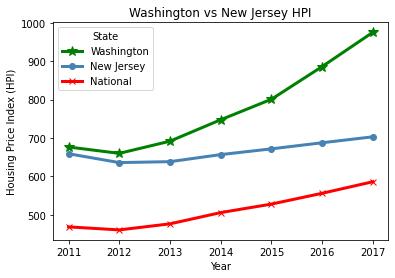

In [112]:
### Create line graph comparing HPI of Washington and New Jersey

#Create pivot tables for plotting
washington_pivot = washington_df.pivot(index='Year', columns='State', values='HPI')
washington_pivot = washington_pivot.reset_index()

washington_percent = washington_df.pivot(index='Year', columns='State', values='Annual Change (%)')
washington_percent = washington_percent.reset_index()

# Set variables and plot
washington_x = washington_pivot['Year']
washington_y = washington_pivot['Washington']

jersey_x = washington_pivot['Year']
jersey_y =washington_pivot['New Jersey']

national_x = national_2011['Year']
national_y = national_2011['HPI']

washington = plt.plot(washington_x, washington_y, color='g', linewidth=3, marker = '*', markersize=10)
jersey = plt.plot(jersey_x, jersey_y, color='steelblue', linewidth=3, marker='o')
us_2011 = plt.plot(national_x, national_y, color='r', linewidth=3, marker='x')
plt.title('Washington vs New Jersey HPI')
plt.xlabel('Year')
plt.ylabel('Housing Price Index (HPI)')
plt.legend(['Washington', 'New Jersey', 'National'], loc='best', title='State')
plt.savefig('images/washington_jersey.png', facecolor='white')
plt.show()

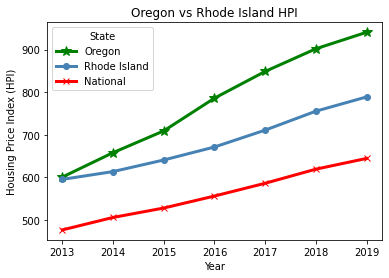

In [113]:
### Create line graph comparing HPI of Oregon and Rhode Island

#Create pivot tables for plotting
oregon_pivot = oregon_df.pivot(index='Year', columns='State', values='HPI')
oregon_pivot = oregon_pivot.reset_index()

oregon_percent = oregon_df.pivot(index='Year', columns='State', values='Annual Change (%)')
oregon_percent = oregon_percent.reset_index()

# Set variables and plot
oregon_x = oregon_pivot['Year']
oregon_y = oregon_pivot['Oregon']

rhode_x = oregon_pivot['Year']
rhode_y = oregon_pivot['Rhode Island']

national_x = national_2013['Year']
national_y = national_2013['HPI']

oregon = plt.plot(oregon_x, oregon_y, color='g', linewidth=3, marker = '*', markersize=10)
rhode = plt.plot(rhode_x, rhode_y, color='steelblue', linewidth=3, marker='o')
us_2013 = plt.plot(national_x, national_y, color='r', linewidth=3, marker='x')
plt.title('Oregon vs Rhode Island HPI')
plt.xlabel('Year')
plt.ylabel('Housing Price Index (HPI)')
plt.legend(['Oregon', 'Rhode Island', 'National'], loc='best', title='State')
plt.savefig('images/oregon_rhode.png', facecolor='white')
plt.show()

In [114]:
# Create list holding the relative year for when a state legalized and add column to each df
relative_year = [-3, -2, -1, 0, 1, 2, 3]
colorado_percent['Relative Year'] = relative_year
washington_percent['Relative Year'] = relative_year
oregon_percent['Relative Year'] = relative_year

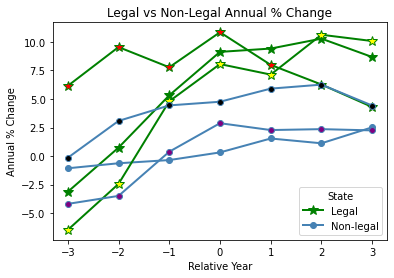

In [115]:
### Create line graph comparing the Annual Percent Change in HPI for each state
colorado = plt.plot(colorado_percent['Relative Year'], colorado_percent['Colorado'].astype(float),\
                    color='g', linewidth=2, marker = '*', markersize=10)
vermont = plt.plot(colorado_percent['Relative Year'], colorado_percent['Vermont'].astype(float),\
                   color='steelblue', linewidth=2, marker='o')
washington = plt.plot(washington_percent['Relative Year'], washington_percent['Washington'].astype(float),\
                      color='g', linewidth=2, marker = '*', markersize=10, mfc='yellow')
jersey = plt.plot(washington_percent['Relative Year'], washington_percent['New Jersey'].astype(float),\
                  color='steelblue', linewidth=2, marker='o', mfc='purple')
oregon = plt.plot(oregon_percent['Relative Year'], oregon_percent['Oregon'].astype(float),\
                  color='g', linewidth=2, marker = '*', markersize=10, mfc='red')
rhode = plt.plot(oregon_percent['Relative Year'], oregon_percent['Rhode Island'].astype(float),\
                 color='steelblue', linewidth=2, marker='o', mfc='black')
plt.title('Legal vs Non-Legal Annual % Change')
plt.xlabel('Relative Year')
plt.ylabel('Annual % Change')
plt.legend(['Legal', 'Non-legal'], loc='best', title='State')
plt.savefig('images/annual_change.png', facecolor='white')
plt.show()

In [116]:
# Combine pivots with relative year into one df for plotting
unpivot_co = pd.melt(colorado_percent, id_vars=['Relative Year'], value_vars=['Colorado', 'Vermont'])
unpivot_wa = pd.melt(washington_percent, id_vars=['Relative Year'], value_vars=['Washington', 'New Jersey'])
unpivot_or = pd.melt(oregon_percent, id_vars=['Relative Year'], value_vars=['Oregon', 'Rhode Island'])
relative_full = pd.concat([unpivot_co, unpivot_wa, unpivot_or])
relative_full.head()

,Relative Year,State,value
0,-3,Colorado,-3.13
1,-2,Colorado,0.74
2,-1,Colorado,5.32
3,0,Colorado,9.13
4,1,Colorado,9.42


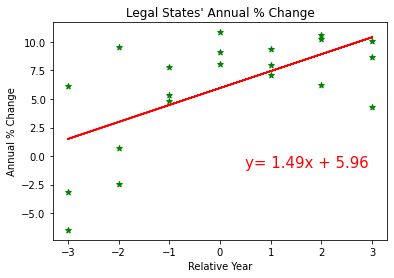

p-value = 0.0024995851640846937


In [117]:
# Create df for legal states' relative year
legal_df = relative_full.loc[(relative_full['State'] == 'Colorado') | (relative_full['State'] == 'Washington') |\
                           (relative_full['State'] == 'Oregon')]
legal_x = legal_df['Relative Year']
legal_y = legal_df['value'].astype(float)

# create linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(legal_x, legal_y)

# create the equation
regress_values = legal_x * slope + intercept
line_eq = f"y= {round(slope,2)}x + {round(intercept,2)}"

# Scatter plot for legal states' annual % change
legal = plt.scatter(legal_x, legal_y,\
                    color='g', marker = '*')
plt.title("Legal States' Annual % Change")
plt.plot(legal_x,regress_values,"r-")
plt.annotate(line_eq,(.5,-1),fontsize=15,color="red")
plt.xlabel('Relative Year')
plt.ylabel('Annual % Change')
plt.savefig('images/legal_annual_change.png', facecolor='white')
plt.show()
print(f"p-value = {pvalue}")

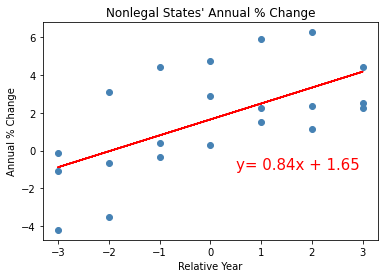

p-value = 0.0026740952061939443


In [118]:
# Create df for non-legal states' relative year
nonlegal_df = relative_full.loc[(relative_full['State'] == 'Vermont') | (relative_full['State'] == 'New Jersey') |\
                           (relative_full['State'] == 'Rhode Island')]
nonlegal_x = nonlegal_df['Relative Year']
nonlegal_y = nonlegal_df['value'].astype(float)

# create linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(nonlegal_x, nonlegal_y)

# create the equation
regress_values = legal_x * slope + intercept
line_eq = f"y= {round(slope,2)}x + {round(intercept,2)}"

# Scatter plot for legal states' annual % change
nonlegal = plt.scatter(nonlegal_x, nonlegal_y,\
                    color='steelblue', marker = 'o')
plt.title("Nonlegal States' Annual % Change")
plt.plot(nonlegal_x,regress_values,"r-")
plt.annotate(line_eq,(.5,-1),fontsize=15,color="red")
plt.xlabel('Relative Year')
plt.ylabel('Annual % Change')
plt.savefig('images/nonlegal_annual_change.png', facecolor='white')
plt.show()
print(f"p-value = {pvalue}")

In [119]:
# Run T-test between the annual % change of legal and nonlegal states
stats.ttest_ind(legal_df['value'].astype(float), nonlegal_df['value'].astype(float), equal_var=False)

Ttest_indResult(statistic=3.516179600926685, pvalue=0.001343851096754382)

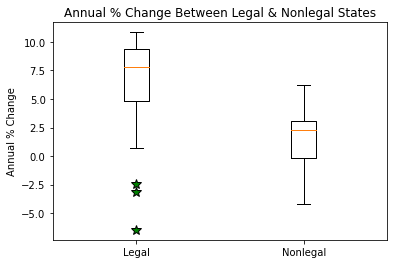

In [120]:
# Create boxplot comparing annual % change between legal and nonlegal states
x_axis = np.arange(0, 2)
fig, ax = plt.subplots()
ax.boxplot(legal_df['value'].astype(float), positions=range(0,1),\
           flierprops={'marker': '*', 'markersize': 10, 'markerfacecolor': 'green'})
ax.boxplot(nonlegal_df['value'].astype(float), positions=range(1,2),\
           flierprops={'marker': '*', 'markersize': 10, 'markerfacecolor': 'green'})
ax.set_xticks(x_axis, labels=('Legal', 'Nonlegal'))
ax.set_ylabel("Annual % Change")
plt.title('Annual % Change Between Legal & Nonlegal States')
plt.savefig('images/boxplot.png', facecolor='white')
plt.show()